# Load and Inspect

In [31]:
import pandas as pd
data = pd.read_csv("churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data.shape

(7043, 21)

In [33]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [35]:
data = data.drop(["customerID"], axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())
data["TotalCharges"].dtype

dtype('float64')

In [37]:
object_cols = data.select_dtypes(include="object").columns
for col in object_cols:
    print(col, ":", data[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [38]:
binary_map = {"Yes":1, "No":0}

for col in ["Partner", "Dependents", "PaperlessBilling", "Churn","PhoneService"]:
    data[col] = data[col].map(binary_map)

In [39]:
replace_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                "StreamingTV","StreamingMovies","MultipleLines"]

for col in replace_cols:
    data[col] = data[col].replace({"No internet service":"No", "No phone service":"No"})
    data[col] = data[col].map(binary_map)


In [40]:
data = pd.get_dummies(
    data,
    columns=["gender", "InternetService", "Contract", "PaymentMethod"],
    drop_first=True
)

data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


# Exploratory Data Analysis

In [41]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Text(0.5, 1.0, 'Churn Distribution')

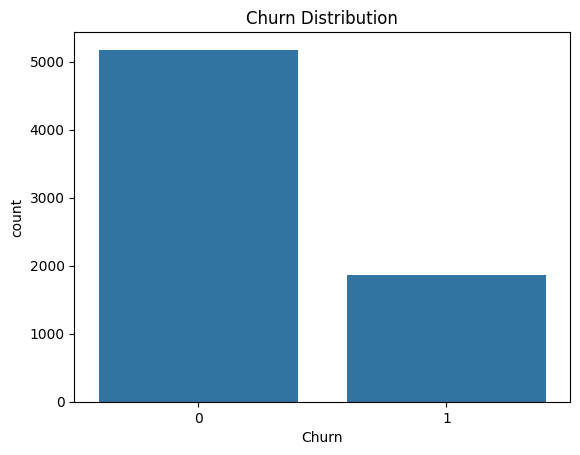

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")

Text(0.5, 1.0, 'Churn vs Tenure')

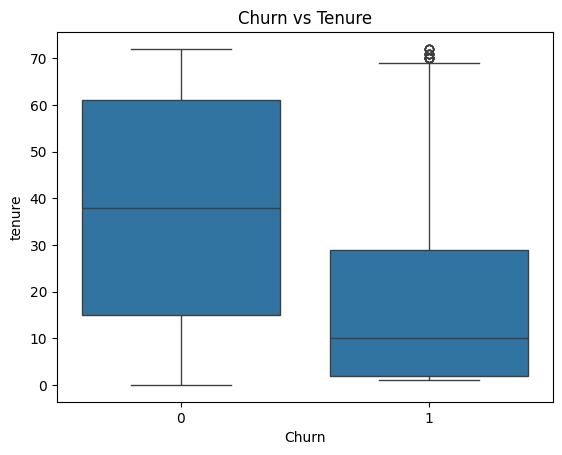

In [43]:
sns.boxplot(x="Churn", y="tenure", data=data)
plt.title("Churn vs Tenure")

Text(0.5, 1.0, 'Churn vs MonthlyCharges')

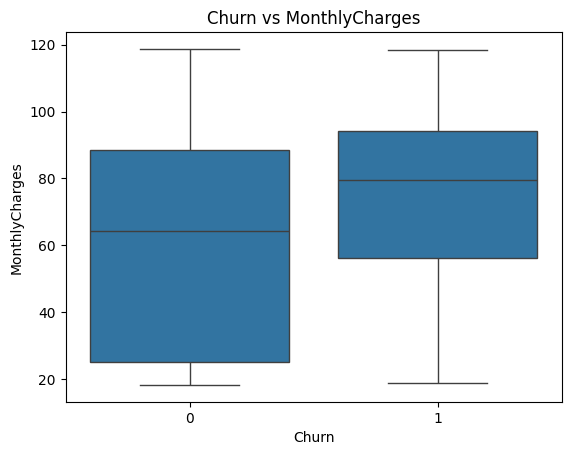

In [44]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Churn vs MonthlyCharges")

Text(0.5, 1.0, 'Correlation Heatmap')

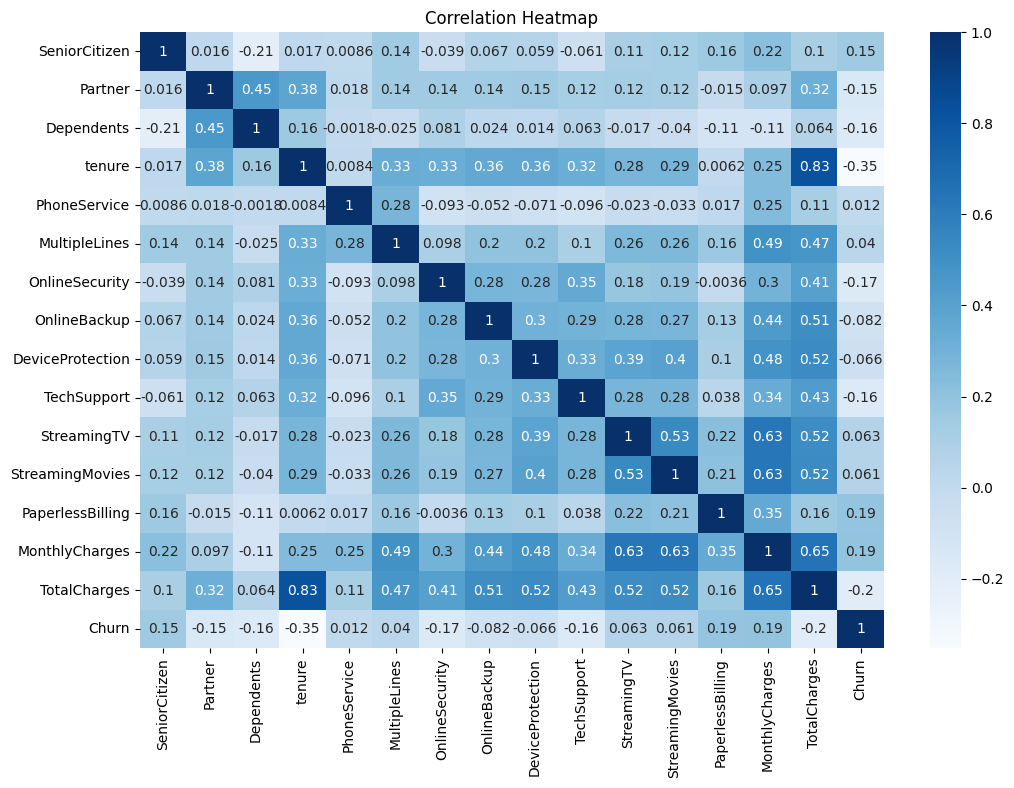

In [45]:
corr = data.select_dtypes(include=["int64", "float64"]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.title("Correlation Heatmap")

# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop("Churn",axis=1)
y = data["Churn"]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 23), (1409, 23), (5634,), (1409,))

# Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

X_train.loc[:, scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test.loc[:, scale_cols]  = scaler.transform(X_test[scale_cols])

# Modeling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "LR": LogisticRegression(max_iter=2000),
    "DTC": DecisionTreeClassifier(max_depth=5),
    "RFC": RandomForestClassifier(n_estimators=300),
    "KNN": KNeighborsClassifier(10)
}

In [52]:
from sklearn.metrics import accuracy_score

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, preds))

LR Accuracy: 0.7970191625266146
DTC Accuracy: 0.7906316536550745
RFC Accuracy: 0.7856635911994322
KNN Accuracy: 0.7835344215755855


In [53]:
final_model = LogisticRegression(max_iter=2000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, final_model.predict_proba(X_test)[:,1]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

AUC: 0.8370366064739466
Confusion Matrix:
[[934 101]
 [185 189]]


# Feature Importance

In [55]:
coef = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": final_model.coef_.ravel()
}).sort_values(by="Coefficient", ascending=False)

coef

,Feature,Coefficient
14,TotalCharges,0.789804
16,InternetService_Fiber optic,0.783359
12,PaperlessBilling,0.327814
21,PaymentMethod_Electronic check,0.265919
5,MultipleLines,0.265473
11,StreamingMovies,0.251990
10,StreamingTV,0.232275
0,SeniorCitizen,0.157821
1,Partner,0.013450
8,DeviceProtection,-0.016367


In [56]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances.head(15)

,Feature,Importance
14,TotalCharges,0.193152
13,MonthlyCharges,0.178453
3,tenure,0.167892
16,InternetService_Fiber optic,0.045562
21,PaymentMethod_Electronic check,0.038922
19,Contract_Two year,0.032449
15,gender_Male,0.028599
12,PaperlessBilling,0.026475
18,Contract_One year,0.024632
6,OnlineSecurity,0.024013


# Thank You :)